In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
data = pd.read_csv('house.csv')
print(data.shape)
data.head()


(545, 2)


,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [25]:
#collecting x and y 
data = data[data['loyer']<2000]
X = data['loyer'].values
Y = data['surface'].values


In [26]:
# The average of x and y
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)
# using the formula to calculate b1 and b0: y = b1x + b0
numer = 0
denom = 0
for i in range (m):
    numer+= (X[i]-mean_x)*(Y[i]-mean_y) 
    denom += (X[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y-(mean_x*b1)
# print the coefficients
print(b1, b0)

0.03422017890596583 -8.484408314602234


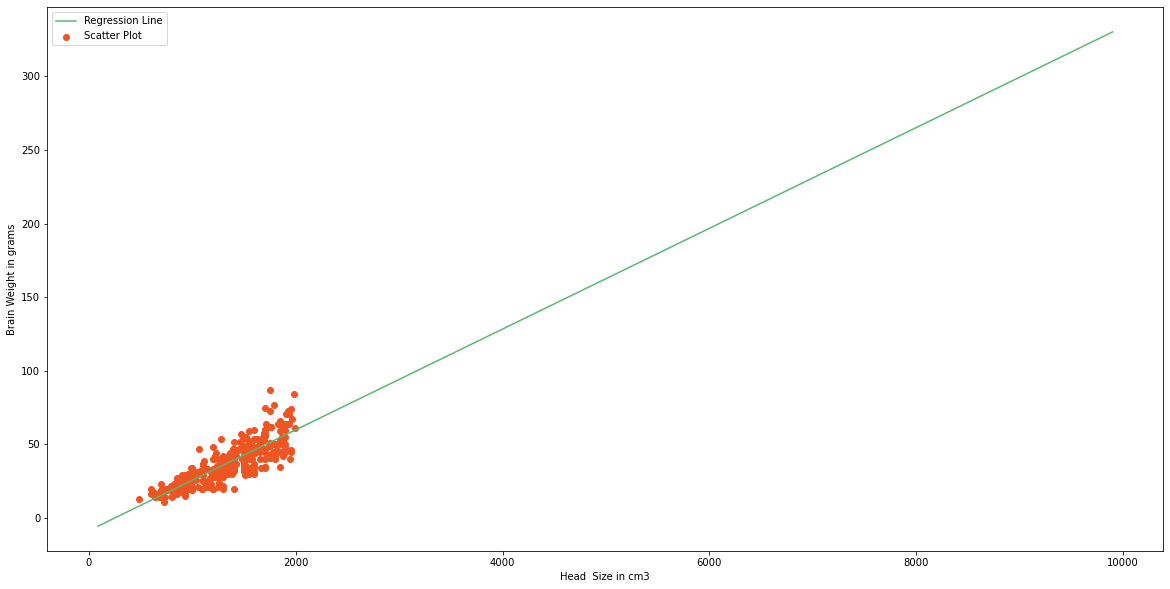

In [27]:
# plotting values and Regression Line

max_x = np.max(x) + 100
min_x = np.min(x) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

# Plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Plotting scatter Points
plt.scatter(X, Y, c = '#ef5423', label = 'Scatter Plot')
plt.xlabel('Head  Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [31]:
ss_t =0
ss_r = 0
for i in range(m):
    y_pred = b0+b1*X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (y_pred - mean_y)**2
r2 = (ss_r/ss_t)
print(r2) 


0.7118636437479403


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m,1))
# Creating Model
reg = LinearRegression()
# Fitting Training data
reg = reg.fit(X, Y)
# Y Prediction 
Y_pred = reg.predict(X)
# Calculating R2 Score

r2_score = reg.score(X, Y)

print(r2_score)

0.7118636437479402
